# Predict House Values

# Import Library, Setup, Views


In [4]:
from plotly.offline import iplot
import chart_studio.plotly as py
import cufflinks
import plotly.graph_objs as go
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
np.random.seed(42)
plt.style.use('ggplot')

<p> Set optiont <p>

In [3]:
font = {'family': 'sans-serif', 'color': '#a72693',
        'weight': 'normal',
        'size': 24, }
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df=pd.read_csv("dataset/train.csv")
test=pd.read_csv("dataset/test.csv")
test_price=pd.read_csv("dataset/sample_submission.csv")
test=pd.merge(test, test_price, how='inner',left_on='Id', right_on='Id')

<h3>HEAD\DESCRIBE\INFO</h2>

In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,"1,993.00",Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.00,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,"2,004.00",RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.00,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,"1,973.00",RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.00,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,"1,931.00",Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.00,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,No

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,379.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,46.55,567.24,"1,057.43","1,162.63",346.99,5.84,"1,515.46",0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,"1,978.51",1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,"1,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,"1,129.50",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,"1,961.00",1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,0.00,477.50,991.50,"1,087.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,"1,980.00",2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,0.00,808.00,"1,298.25","1,391.25",728.00,0.00,"1,776.75",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,"2,002.00",2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,"2,010.00",4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


In [8]:
#prof=ProfileReport (df.sample(n = 10000)) 
prof=ProfileReport(df,title="Pandas Prifiling Report Report",html={'style':{'full_width':True}})


In [9]:
prof.to_file(output_file = 'output.html')

C:\Users\MiAir\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:107: UserWarning:

There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')



<p>For more detailed information open 'output.html'. Library pandas_profiling provides summary about variables, their interaction, correlation. And amount of missing variable in each feature</p>

<h1>Visualization</h1>

<h2>See disribituion of data</h2>

<p>As we can see distribution of Price is Right-Skewed Distribution. And for more interactive we can run plot, that commented, because it is interactive graph</p>

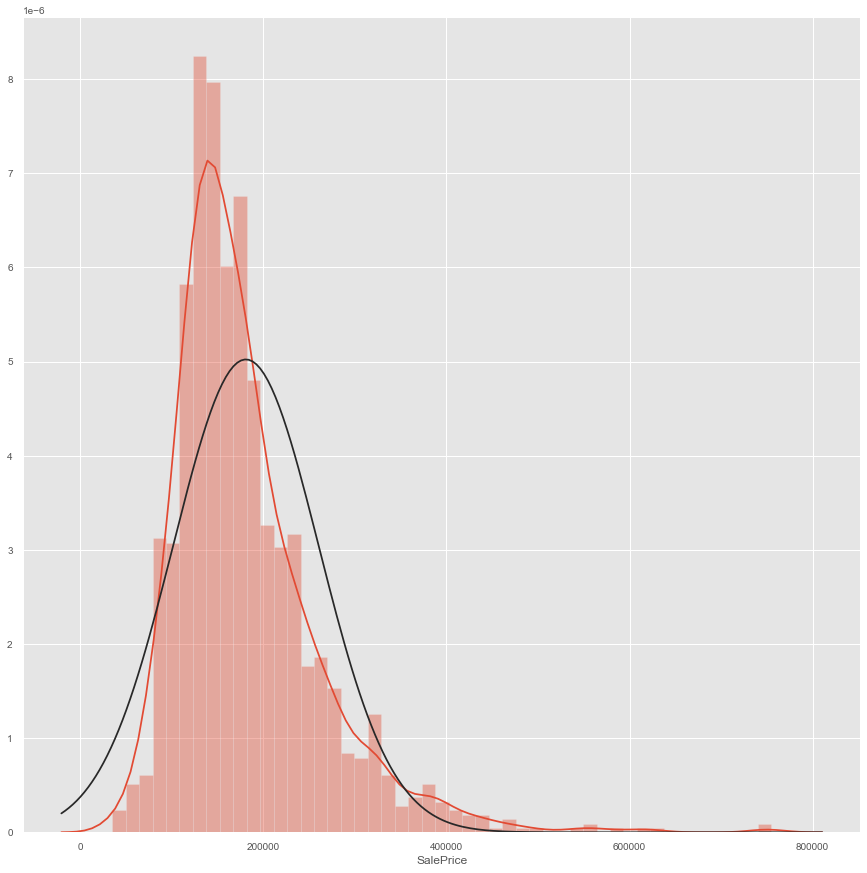

In [10]:
from scipy.stats import norm
plt.figure(figsize=(15,15))
sns.distplot(df['SalePrice'],fit=norm)
# df['SalePrice'].iplot(kind='hist', xTitle='Sale Price',
#                   yTitle='count', title='Claps Distribution')
# fig = px.histogram(df, x="SalePrice")
# fig.show()

<p>To confirm our hypothesis runs shapiro wilk test</p> 

In [11]:
from scipy.stats import  shapiro
shapiro(df['SalePrice'])

ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)

<p>Make more detailed plot</p>

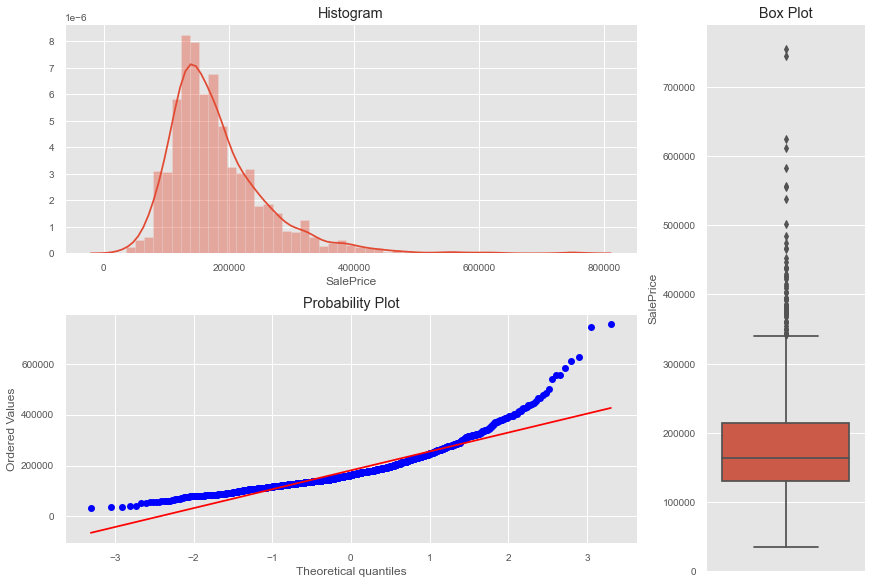

In [12]:
from scipy import stats
import matplotlib.gridspec as gridspec
def plotting_3_chart(df, feature):
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(df, 'SalePrice')

In [17]:
np.log1p(df['SalePrice']).iplot(kind='hist', xTitle='Sale Price',
                  yTitle='count', title='Claps Distribution')
#fig = px.histogram(df, x="SalePrice")

<h2>Correlation</h2>

In [18]:
corr_matrix=df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
GarageYrBlt      0.49
MasVnrArea       0.48
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.35
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
Id              -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

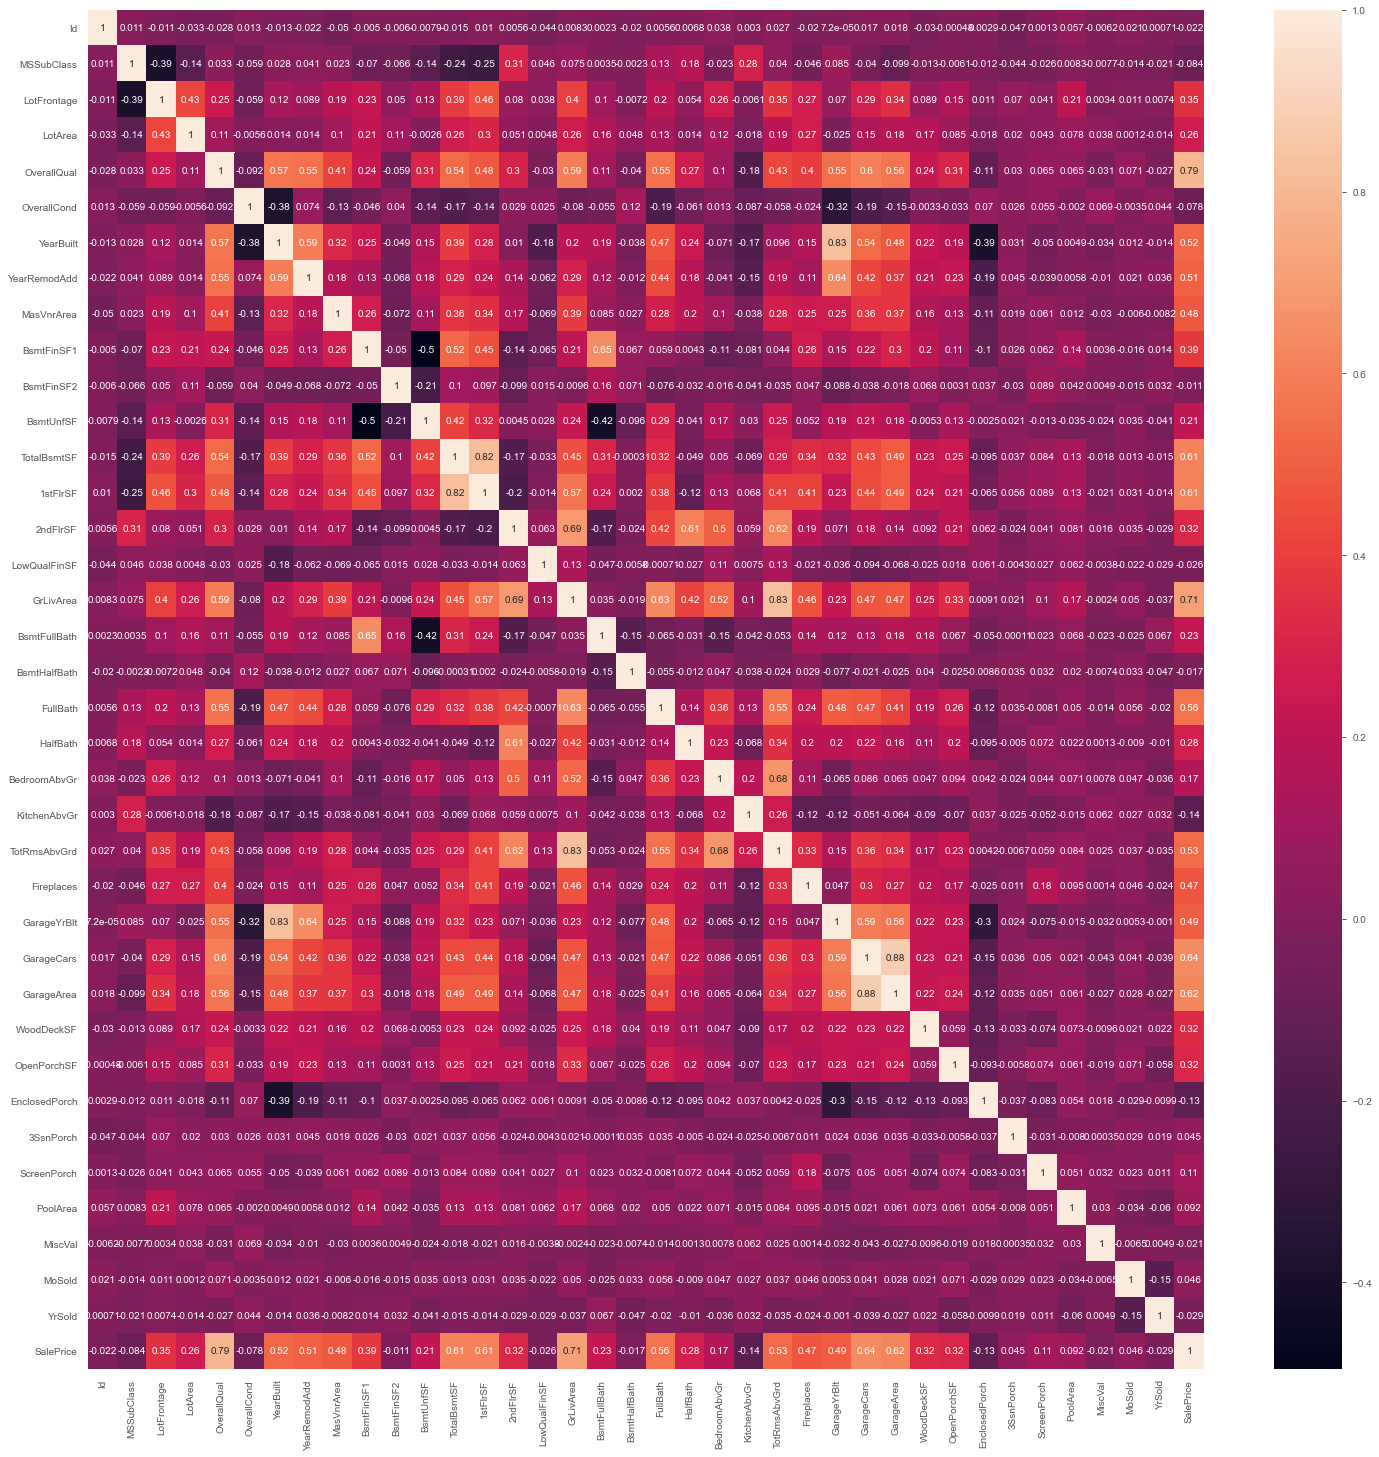

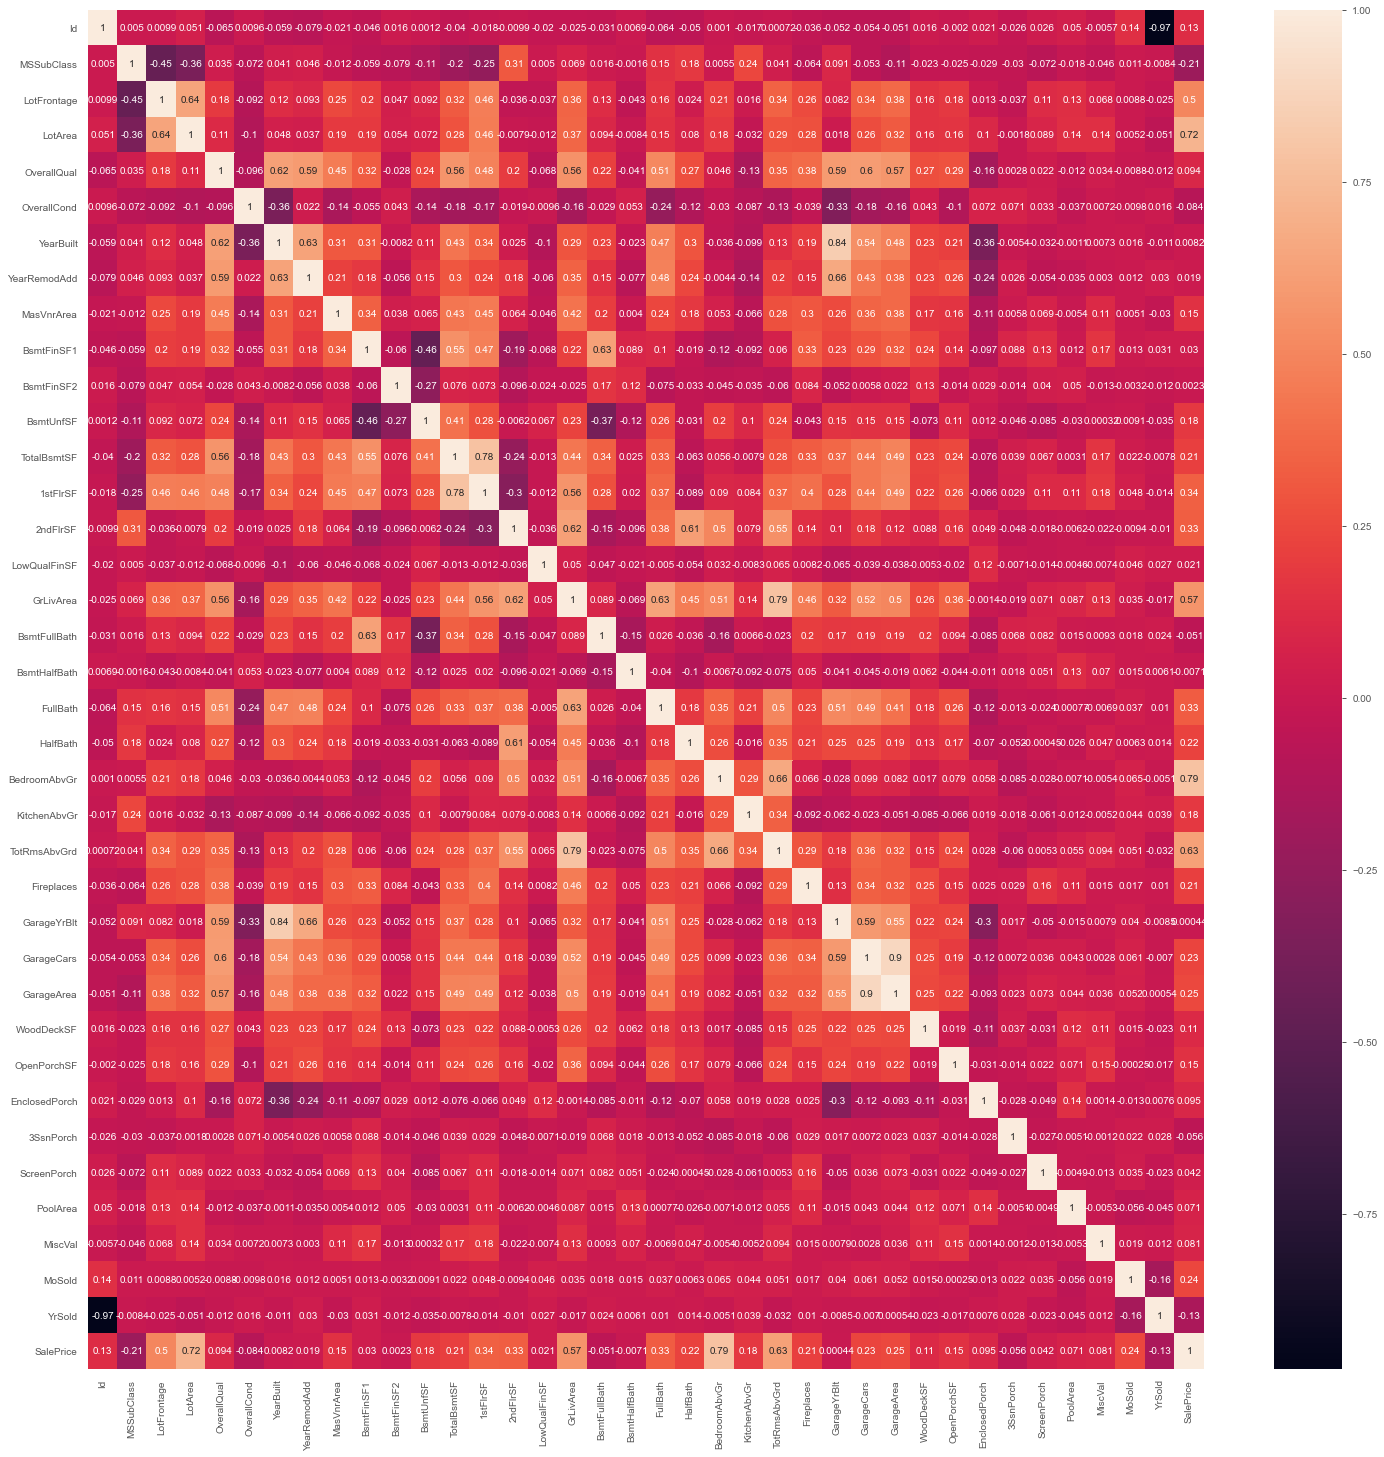

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix,annot=True)
plt.show()
plt.figure(figsize=(25,25))
sns.heatmap(test.corr(),annot=True)
plt.show()


In [20]:
#kot = corr_matrix[corr_matrix>=.7]
#sns.heatmap(kot, cmap="Greens")
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

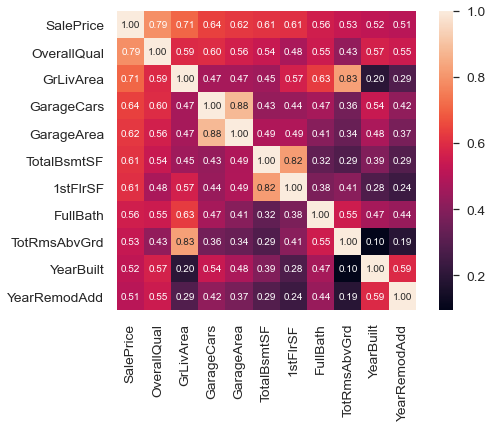

In [21]:
cols = corr_matrix.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [22]:
corr_matrix.nlargest(15,"SalePrice").index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

## View most importan feature

In [23]:
important_feature=df[[ 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1']]
# ProfileReport(important_feature,title="Pandas Prifiling Report Report",html={'style':{'full_width':True}})
# dimportant_feature.head(10)

In [24]:
cat_py=['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','Fireplaces']
num_py=['GrLivArea','GarageArea','TotalBsmtSF','MasVnrArea','BsmtFinSF1']
year=['YearBuilt','YearRemodAdd','GarageYrBlt']

In [25]:
def sn_scatter(name,model):
    sns.scatterplot(x="SalePrice", y=name, data=model)
    plt.show()
def py_scatter(name,data):
    fig = px.scatter(data,               #dataframe
                 x = "SalePrice",  #x-values column
                 y = name #y-values column
                 )
    fig.show()

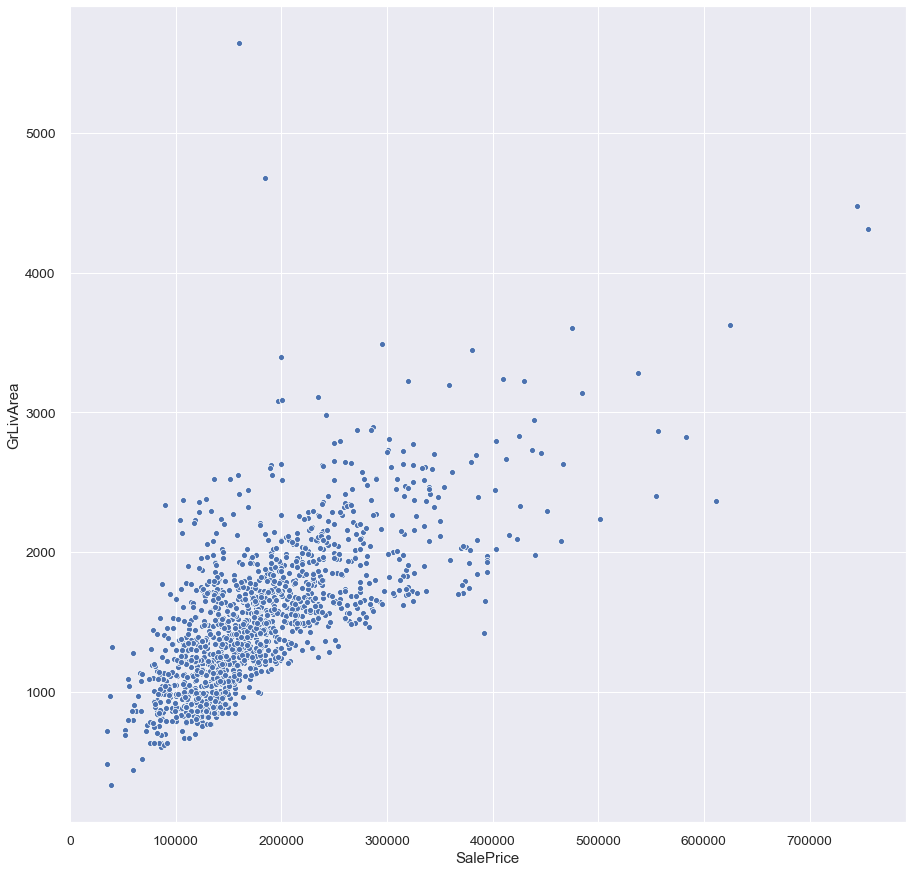

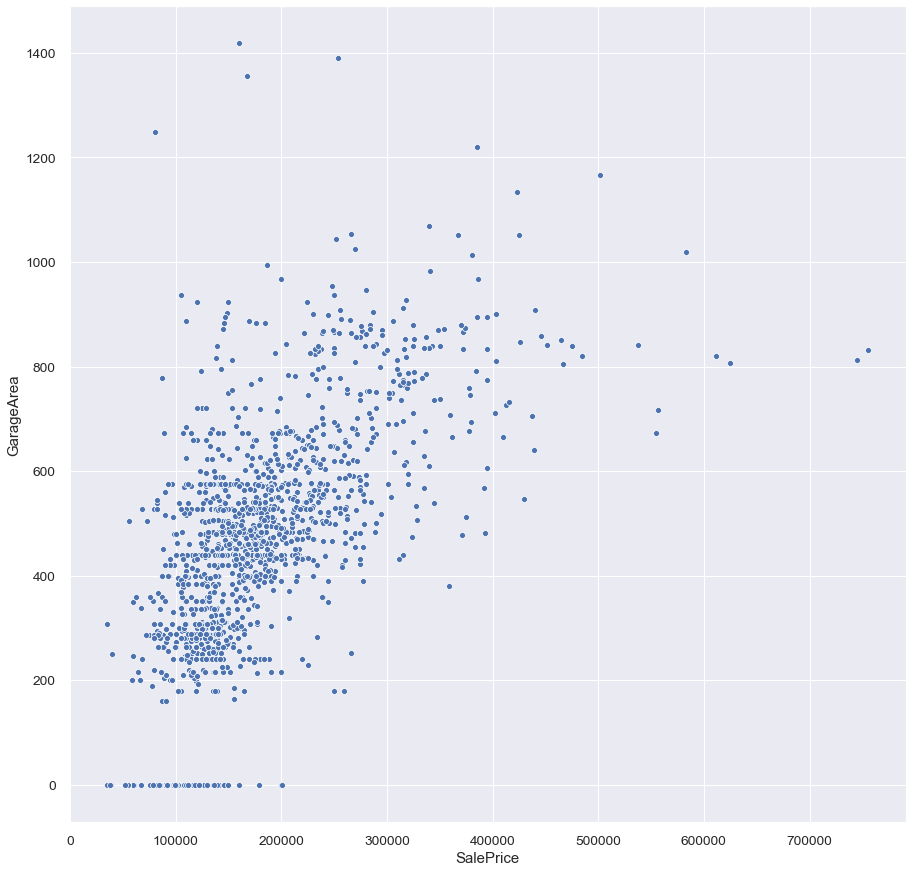

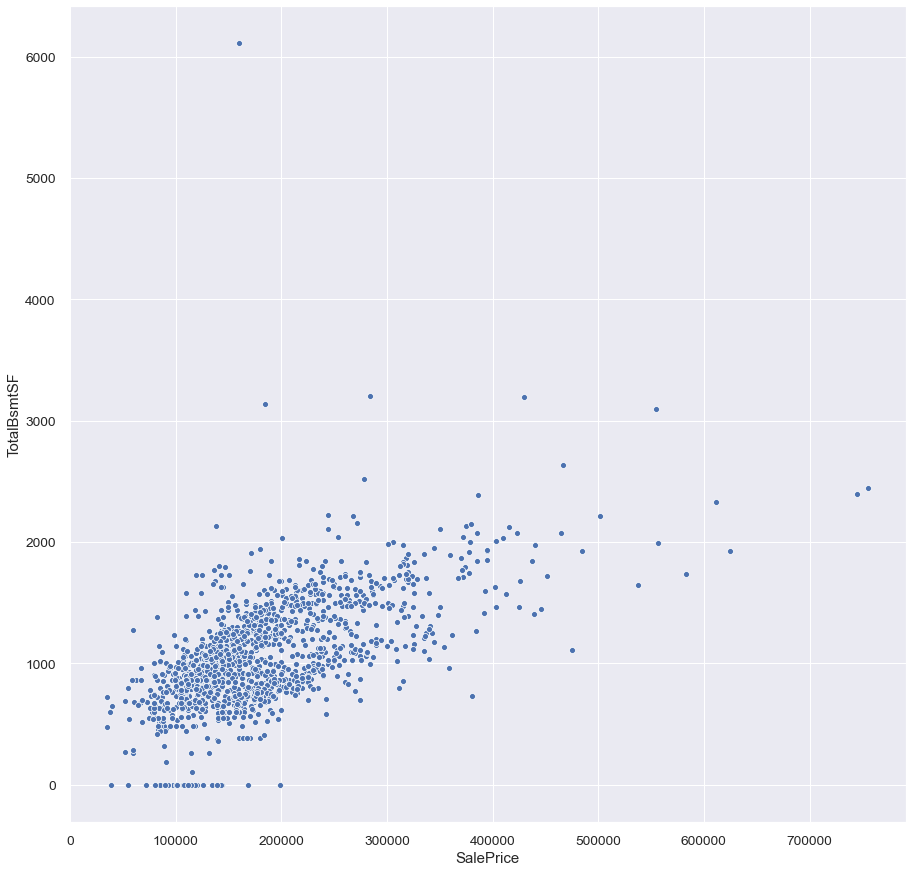

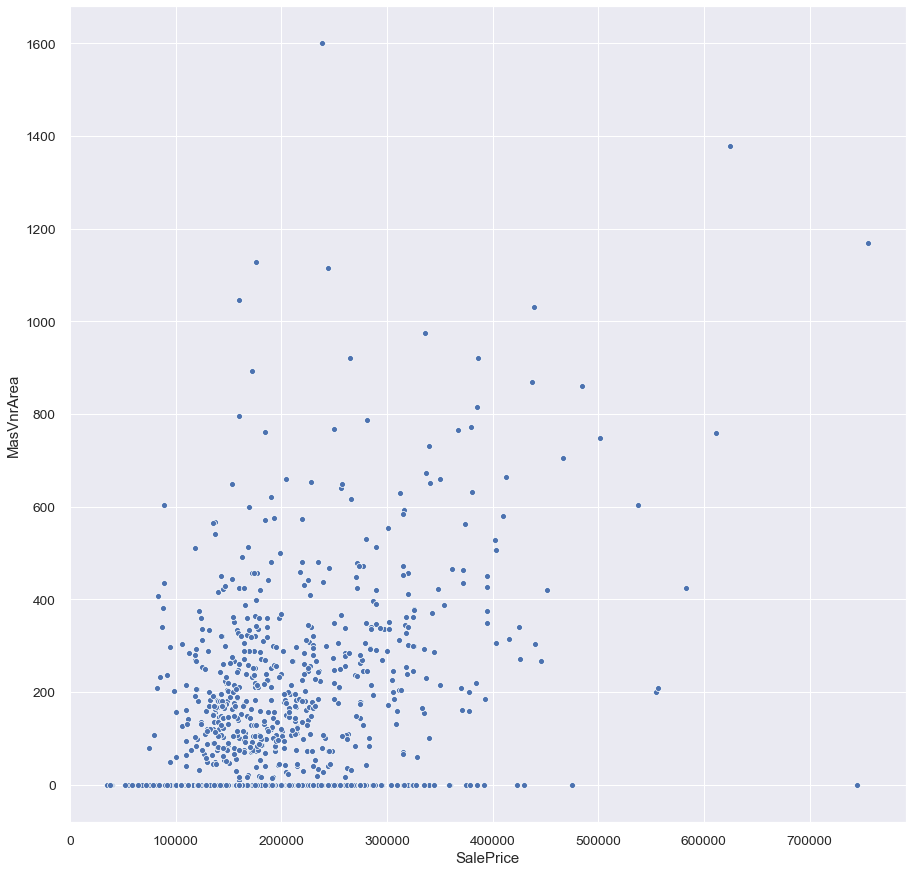

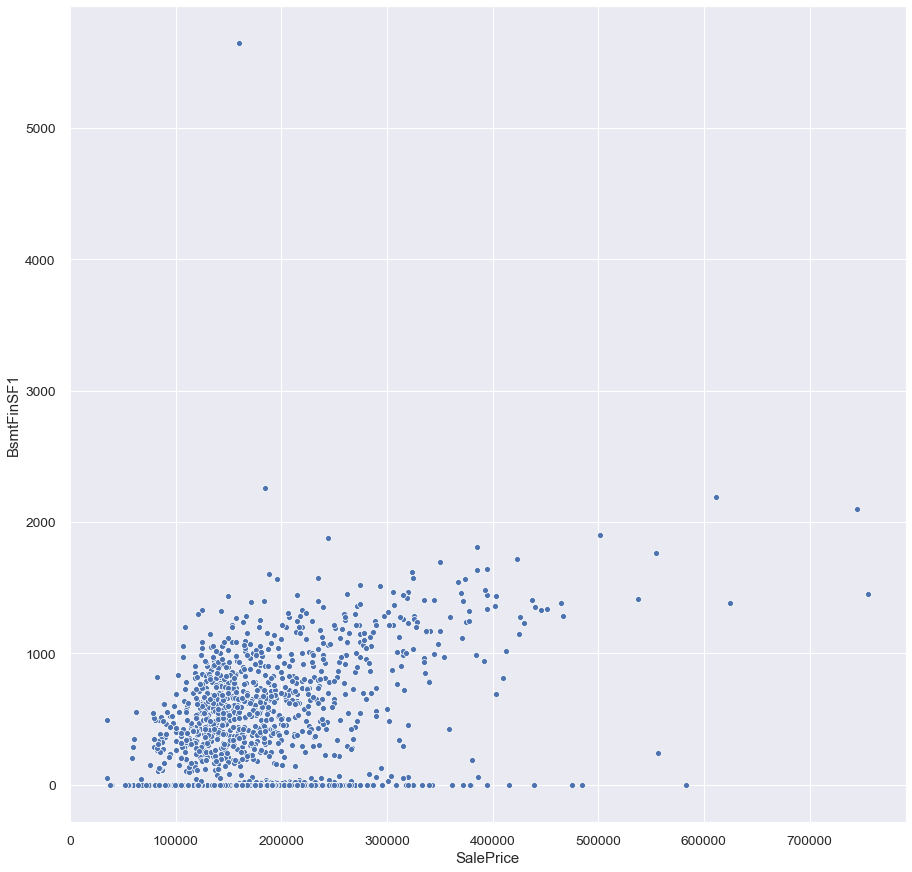

In [30]:
for i in num_py:
    plt.figure(figsize=(15,15))
    sn_scatter(i,df)
# for i in num_py:
#     py_scatter(i,df)

In [31]:
def sn_box(name,data):
    sns.boxplot(y="SalePrice", x=name, data=data, palette='rainbow')
    plt.show()

def py_box(name,data):
    data.pivot(columns=name, values='SalePrice').iplot(
        kind='box',
        yTitle='SalePrice',)
    plt.show()

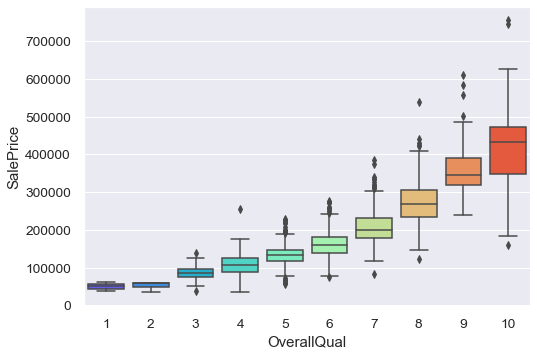

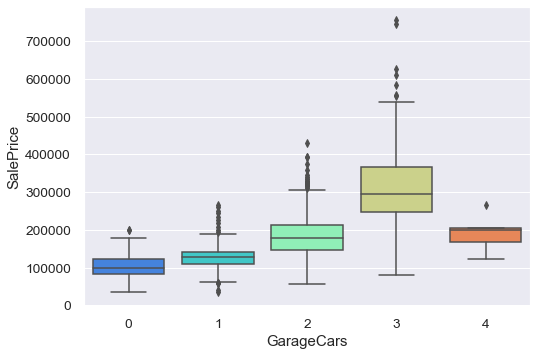

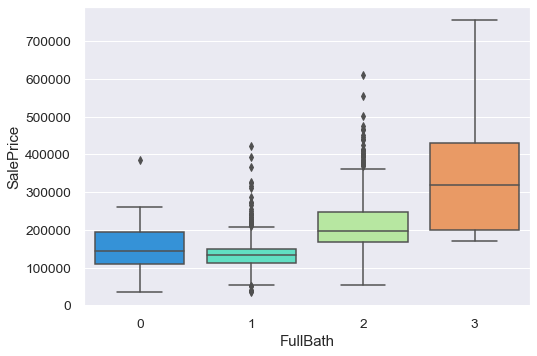

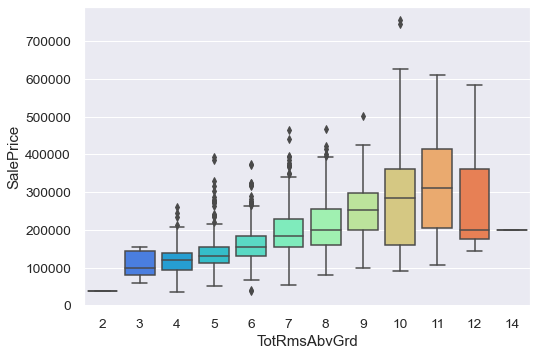

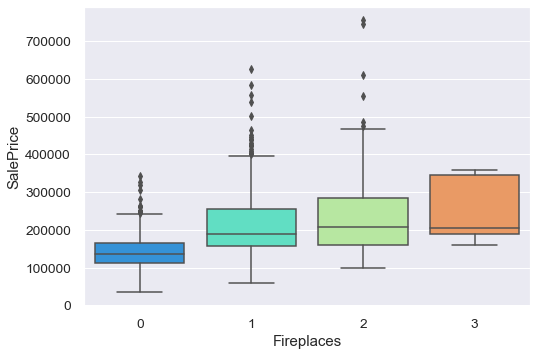

In [32]:
for i in cat_py:
    sn_box(i,df)
# for i in cat_py:
#     py_box(i,df)
# for i in year:
#     py_scatter(i,df)

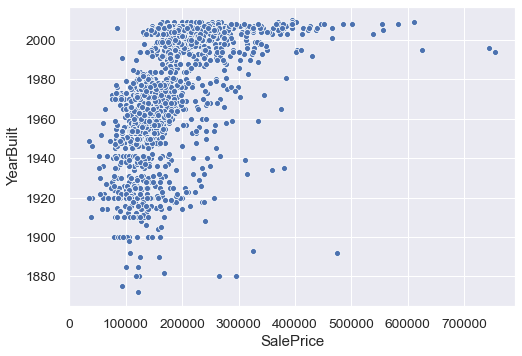

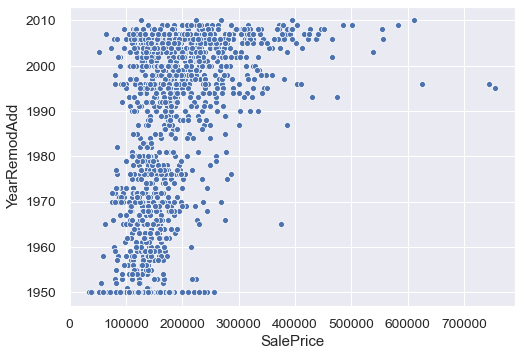

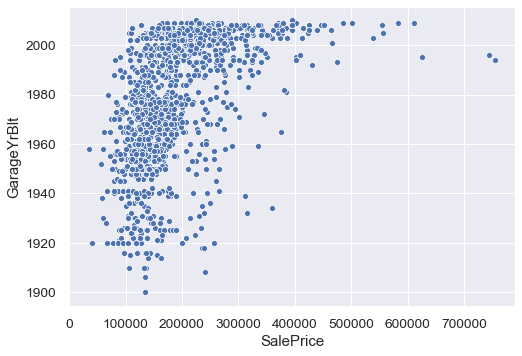

In [33]:

for i in year:
    sn_scatter(i,df)

In [34]:
year=["YearBuilt", "YearRemodAdd", "GarageYrBlt","YrSold"]
def year_py(name):
    df[name].iplot(kind='hist', xTitle=name,
                  yTitle='count', title='Claps Distribution')

In [35]:
from scipy.stats import norm
def dist(name,data):
    sns.distplot(data[name], fit=norm)
    
def qq(name,data):
    stats.probplot(data[name], plot=plt)

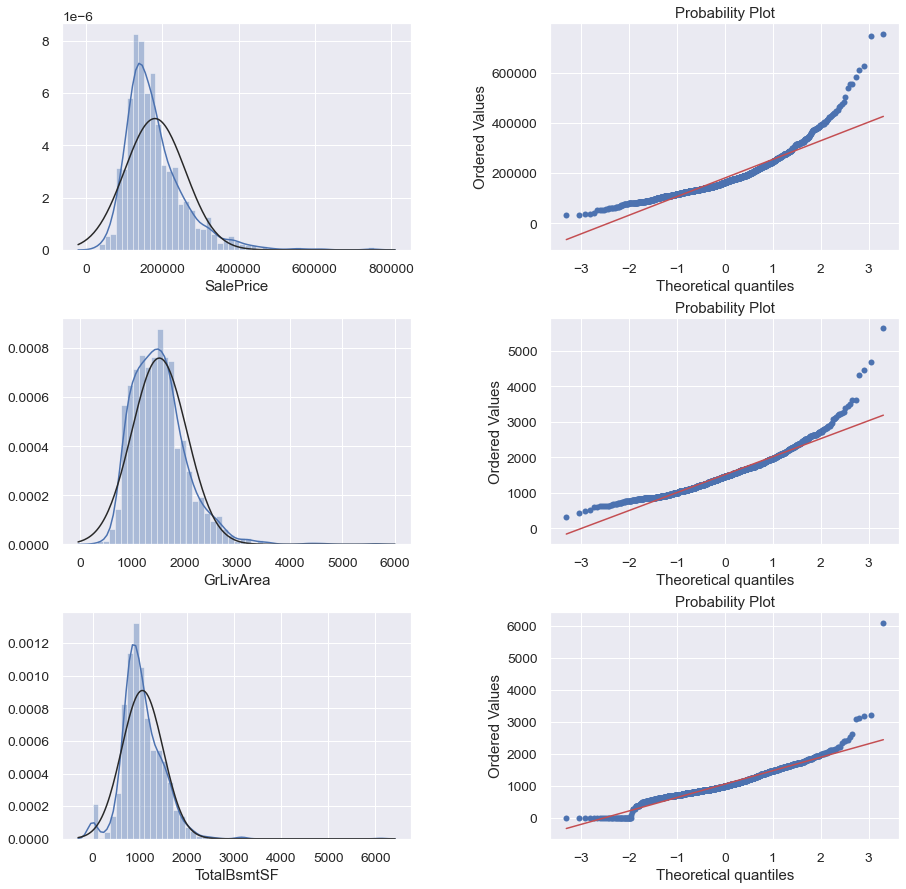

In [36]:
#enumerate(name)
name=['SalePrice','GrLivArea','TotalBsmtSF']
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3)
plt.figure(figsize=(15,15))
k=0
for i in name:
    plt.subplot(grid[k,0])
    dist(i,df)
    plt.subplot(grid[k,1])
    qq(i,df)
    k+=1

# Delete correlated feature and outliners

In [41]:
from copy import deepcopy
buff=deepcopy(df)

In [42]:
a=df.columns[df.isna().any()].tolist()
#ProfileReport(df[a])

In [75]:
delete=['MiscFeature','PoolQC','Alley']
missing_cat=['GarageCond','GarageQual','GarageFinish','GarageYrBlt',
             'GarageType','Electrical','BsmtFinType2','BsmtFinType1',
             'BsmtExposure','BsmtCond','BsmtQual']
    


missing_num=['MasVnrArea','LotFrontage']
    
for i in (missing_cat+missing_fill+missing_num):
    buff[missing_cat]=buff[missing_cat].fillna(df[i].value_counts().index[0])
    buff[missing_fill]=buff[missing_fill].fillna("No")
    buff[missing_num]=buff[missing_num].fillna(buff[missing_num].mean())




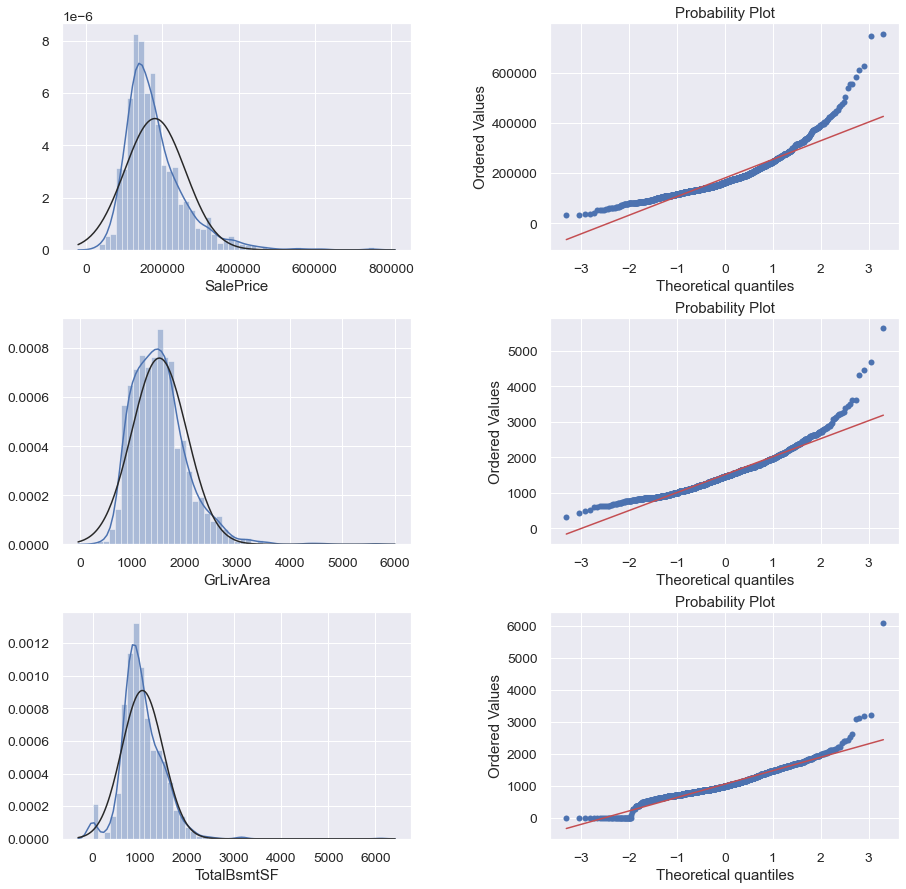

In [43]:
from matplotlib import pyplot as plt
name=['SalePrice','GrLivArea','TotalBsmtSF']
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3)
plt.figure(figsize=(15,15))
k=0
for i in name:
    plt.subplot(grid[k,0])
    dist(i,buff)
    plt.subplot(grid[k,1])
    qq(i,buff)
    k+=1

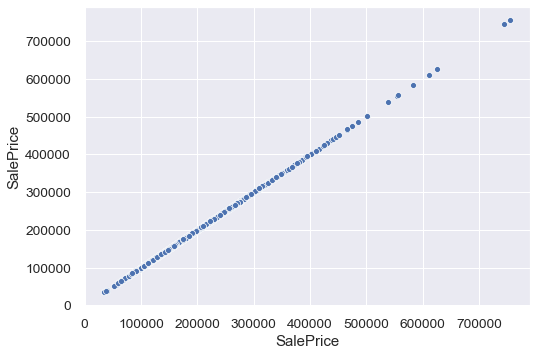

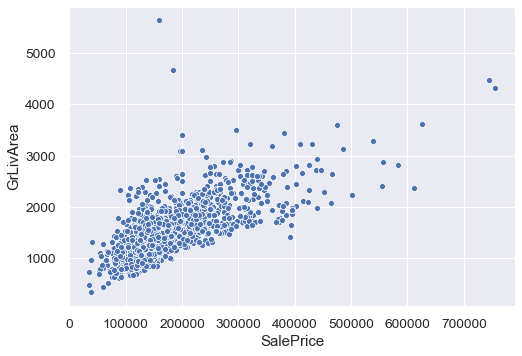

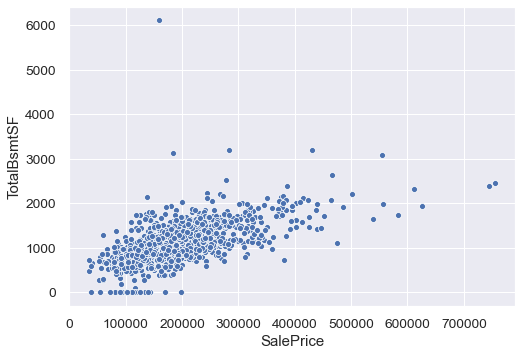

In [39]:
for i in name:
    sn_scatter(i,df)

# Prepare the data for Machine Learning algorithms

In [5]:
df=pd.read_csv("dataset/train.csv")
test=pd.read_csv("dataset/test_as.csv")
#test_price=pd.read_csv("dataset/sample_submission.csv")
dr = ['Alley','Fence','FireplaceQu','MiscFeature','PoolQC','Utilities']
#test=pd.merge(test, test_price, how='inner',left_on='Id', right_on='Id')

In [53]:
test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.00,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.00,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.00,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.00,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.00,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
5,60,RL,75.00,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,84,0,0,0,0,0,4,2010,WD,Normal
6,20,RL,nan,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,21,0,0,0,0,500,3,2010,WD,Normal
7,60,RL,63.00,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,75,0,0,0,0,0,5,2010,WD,Normal
8,20,RL,85.00,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
9,20,RL,70.00,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,4,2010,WD,Normal


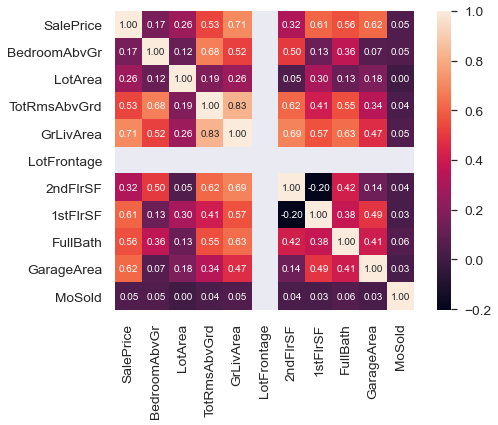

In [6]:
corr_matrix=test.corr()
cols = corr_matrix.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

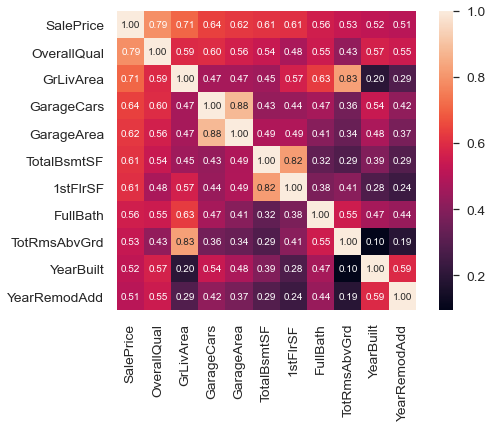

In [7]:
corr_matrix=df.corr()
cols = corr_matrix.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [8]:
test_price=test['SalePrice']
test.drop('SalePrice',axis=1,inplace=True)
dr = ['Alley','Fence','FireplaceQu','MiscFeature','PoolQC','Id']
test.drop(dr,axis=1,inplace=True)
df.drop(dr,axis=1,inplace=True)

df['MSSubClass'] = df['MSSubClass'].astype('object')
test['MSSubClass'] = test['MSSubClass'].astype('object')

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin


class NumericSelector(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        X = pd.DataFrame(data=X, columns=num_col)
        #print(X.shape)
        for i in aks:
            X[i] = stats.boxcox(X[i].values+1)[0]
        #print(X.shape)
        TotalSF=X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
        YrBltAndRemodF=X['YearBuilt'] + X['YearRemodAdd']
        Total_sqr_footage=X['BsmtFinSF1'] +  X['BsmtFinSF2'] + X['1stFlrSF']+X['2ndFlrSF']
        Total_Bathrooms=X['FullBath'] + X['HalfBath'] +  X['BsmtFullBath']+X['BsmtHalfBath']
        Total_porch_sf=X['OpenPorchSF'] + X['3SsnPorch'] +  X['EnclosedPorch']+X['ScreenPorch']+X['WoodDeckSF']
        X.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd',
                'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath', 'BsmtFullBath',
                'BsmtHalfBath', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], axis=1, inplace=True)
        X=np.c_[X.values,TotalSF.values,YrBltAndRemodF.values,
                Total_sqr_footage.values,Total_Bathrooms.values,Total_porch_sf.values]
        return X
        
    

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pip = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('attribs_adder', NumericSelector()),
    ('std_scaler', StandardScaler()),
])
#num=df.select_dtypes(exclude=['object']).columns.tolist()
#num_pip.fit_transform(df.select_dtypes(exclude=['object']))

In [11]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = pd.DataFrame(X, columns=cat_col)
        for i in miss_in_df_test:
            X[i] = X[i].fillna('No')
        return X


In [12]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
cat_pipeline = Pipeline([
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OrdinalEncoder()),
    ])



In [13]:
from scipy.stats import skew 
#missing_fill=['Fence','FireplaceQu']
#miss_only_in_test=['MSZoning' , 'Functional', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


def find_ask(model):
    numeric_feats = model.dtypes[model.dtypes != "object"].index
    # Check the skew of all numerical features
    skewed_feats = model[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    return skewness[(skewness['Skew']>0.75)].index.tolist()

def cat_num(model):
    return model.select_dtypes(exclude=['object']).columns.tolist(), model.select_dtypes(include=['object']).columns.tolist(),  model.select_dtypes(exclude=['object']),         model.select_dtypes(include=['object'])


def indexs(col,model):
    return {i:list(model.columns).index(i) for i in col}

def delete_outliers(model):
    return model[(model['TotalBsmtSF']<6000) & (model['MasVnrArea']<1500)  & 
      (model['BsmtFinSF1']<5000) & (model['GarageArea']<1240) &
      (model['GrLivArea']<4500) & (model['SalePrice']<700000)]

def label(label):
    return stats.boxcox(label.ravel())
    #return pd.Series(index_num,index=a)
# df.shape,df[df['MasVnrArea']<1500].shape,df[df['TotalBsmtSF']<6000].shape,df[df['SalePrice']<700000].shape,\
# df[df['BsmtFinSF1']<5000].shape,df[df['GarageArea']<1240].shape,df[df['GrLivArea']<4500].shape

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from scipy import stats 
# miss_in_df_test = ['GarageQual', 'GarageFinish', 'GarageCond', 'GarageType', 'MasVnrType',
#                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']
miss_in_df_test=missing_percentage(df.select_dtypes(include=['object'])).index.tolist()
d = indexs(df.select_dtypes(exclude=['object']).columns.tolist(), df.select_dtypes(exclude=['object']))
df = delete_outliers(df)
price = df[['SalePrice']].values
df = df.drop(['SalePrice'], axis=1)
aks=find_ask(df)
num_col, cat_col, num, cat = cat_num(df)
# missung_cat=list(cat.isnull().sum()[cat.isnull().sum()>0].index)

In [15]:
full_pipeline = ColumnTransformer([
        ("num", num_pip, num_col),
        ("cat_pipeline", cat_pipeline, cat_col),
    ])
prepared=full_pipeline.fit_transform(df)

In [16]:
aks=find_ask(test)
miss_in_df_test=missing_percentage(test.select_dtypes(include=['object'])).index.tolist()
d=indexs(test.select_dtypes(exclude=['object']).columns.tolist(),test.select_dtypes(exclude=['object']))
num_col, cat_col, num,cat=cat_num(test)
#missung_cat=list(cat.isnull().sum()[cat.isnull().sum()>0].index)


In [17]:
prepared_test=full_pipeline.fit_transform(test)

In [57]:
clear_col=list(df.columns)
a=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd',
                'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'HalfBath', 'BsmtFullBath',
                'BsmtHalfBath', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF']
lot=[]
for i in clear_col:
    if i not in a:
        lot+=[i]
clear_col=lot

# Select and train a model 

## Linear model

In [18]:
pd.set_option('display.float_format', '{:.2f}'.format)
def display_scores(x,y):
    return pd.Series([r2_score(x,y),
           mean_squared_error(x,y),
           np.sqrt(mean_squared_error(x,y)),
           mean_absolute_error(x,y)], 
          index=['R2', 'MSE', 'RMSE', 'MAE'])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#price_bc,lamb=label(price)
price_bc=np.log1p(price)
lin_reg = LinearRegression()
lin_reg.fit(prepared, price_bc)

LinearRegression()

In [20]:
from scipy.special import boxcox, inv_boxcox
#predict=inv_boxcox(lin_reg.predict(prepared),lamb)
predict=lin_reg.predict(prepared)
predict_e=np.expm1(lin_reg.predict(prepared))

In [23]:
display_scores(predict,price_bc),display_scores(predict_e,price)

(R2     0.91
 MSE    0.01
 RMSE   0.11
 MAE    0.08
 dtype: float64,
 R2             0.92
 MSE    419765147.90
 RMSE       20488.17
 MAE        13859.81
 dtype: float64)

In [24]:
def train_validate_report(model, X_train, y_train,X_valid, y_valid,feature_names, forest=False):
    model.fit(X_train, y_train)
    pr=np.expm1(model.predict(X_valid))
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid,pr)))
    print("R2=%f " % r2_score(y_valid,pr))
    coef = model.feature_importances_ if forest else model.coef_
    print(sorted(coef))
    coef_name= "Importances" if forest==True else 'Coef'
    print(pd.DataFrame(coef,feature_names, columns=[coef_name]).sort_values(by=coef_name, ascending=False))
   

In [ ]:
# from sklearn.linear_model import Lasso, Ridge
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDRegressor
# param_grid = [
#     # try 12 (3×4) combinations of hyperparameters
#     {'penalty': ['l2'], 'alpha': [0.001, 0.1, 10, 20,30]},
#     {'penalty': ['l1'], 'alpha': [0.001, 0.1, 10, 20,30]},
#     {'penalty': ['elasticnet'], 'alpha': [0.001, 0.1, 10, 20,30],'l1_ratio':[0.15,0.4,0.6,0.85]},
#     # then try 6 (2×3) combinations with bootstrap set as False
#   ]

# SGD_reg = SGDRegressor(random_state=42,max_iter=5000)
# grid_search = GridSearchCV(SGD_reg, param_grid, cv=5,
#                            scoring='neg_mean_squared_error', return_train_score=True)
# grid_search.fit(prepared, price_bc.ravel())
# print(grid_search.best_params_,grid_search.best_score_,grid_search.best_estimator_)

In [25]:
# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [107]:
# predict=grid_search.predict(prepared)
# predict_e=np.expm1(grid_search.predict(prepared))

In [26]:
# display_scores(predict_e,price),display_scores(predict,price_bc)

In [28]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
param_grid = [
   {'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}
  ]

ridge=Ridge(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_l = GridSearchCV(ridge, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_l.fit(prepared, price_bc.ravel())


GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid=[{'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50,
                                    75]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
cvres = grid_l.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.12059659767230857 {'alpha': 0.05}
0.12058405543055513 {'alpha': 0.1}
0.12054087398030701 {'alpha': 0.3}
0.12044550518444382 {'alpha': 1}
0.12034320477888735 {'alpha': 3}
0.12030283054807787 {'alpha': 5}
0.12024724234855767 {'alpha': 10}
0.12021355673936704 {'alpha': 15}
0.12019371534520377 {'alpha': 30}
0.12029616841044923 {'alpha': 50}
0.12054929815702432 {'alpha': 75}


In [30]:
grid_l.best_params_
predict=grid_l.predict(prepared)
predict_e=np.expm1(grid_l.predict(prepared))

Text(0, 0.5, 'rmse')

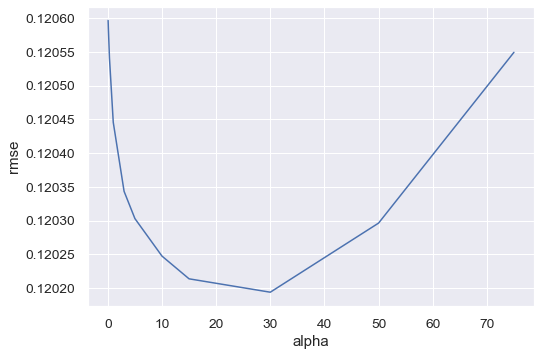

In [31]:
cvres = grid_l.cv_results_
mean_score,params =cvres["mean_test_score"], cvres["params"]
plt.plot([0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],np.sqrt(-mean_score))
plt.xlabel("alpha")
plt.ylabel("rmse")    

In [114]:
display_scores(predict_e,price)

R2             0.92
MSE    427296497.22
RMSE       20671.15
MAE        13968.55
dtype: float64

In [115]:
display_scores(predict,price_bc)

R2     0.91
MSE    0.01
RMSE   0.11
MAE    0.08
dtype: float64

In [32]:

param_grid = [
   {'alpha': [0.005,0.05, 0.1, 0.3, 1, 3]}
  ]

lasso=Lasso(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_lasso = GridSearchCV(lasso, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_lasso.fit(prepared, price_bc.ravel())


GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid=[{'alpha': [0.005, 0.05, 0.1, 0.3, 1, 3]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
cvres = grid_lasso.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.12163298205476943 {'alpha': 0.005}
0.1589799090369682 {'alpha': 0.05}
0.20343944629691088 {'alpha': 0.1}
0.3716715964695313 {'alpha': 0.3}
0.39584171791818074 {'alpha': 1}
0.39584171791818074 {'alpha': 3}


In [34]:
grid_l.best_params_
predict=grid_lasso.predict(prepared)
predict_e=np.expm1(grid_lasso.predict(prepared))

Text(0, 0.5, 'rmse')

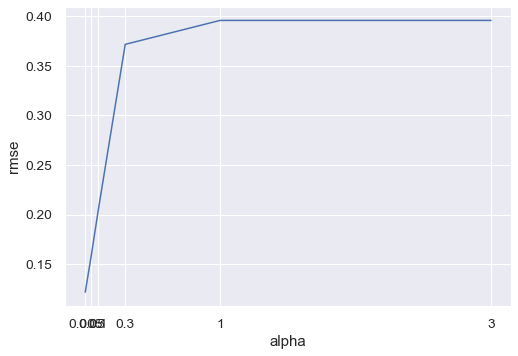

In [35]:
cvres = grid_lasso.cv_results_
mean_score,params =cvres["mean_test_score"], cvres["params"]
axes= plt.axes()
plt.plot([0.005,0.05, 0.1, 0.3, 1, 3],np.sqrt(-mean_score))
axes.set_xticks([0.005,0.05, 0.1, 0.3, 1, 3])
axes.set_xticklabels([0.005,0.05, 0.1, 0.3, 1, 3])
plt.xlabel("alpha")
plt.ylabel("rmse")    

In [36]:
display_scores(predict_e,price)

R2             0.90
MSE    488425739.23
RMSE       22100.36
MAE        14560.43
dtype: float64

In [37]:
display_scores(predict,price_bc)

R2     0.90
MSE    0.01
RMSE   0.12
MAE    0.08
dtype: float64

In [38]:
print(grid_lasso.best_params_,grid_lasso.best_score_,grid_lasso.best_estimator_)

{'alpha': 0.005} -0.01479458232353586 Lasso(alpha=0.005, random_state=42)


In [40]:
coef = pd.Series(grid_lasso.best_estimator_.coef_)
coef.shape,clear

(63,)

## Tree

In [42]:
import xgboost as xgb
dtrain = xgb.DMatrix(prepared, label = price_bc)
dtest = xgb.DMatrix(prepared_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

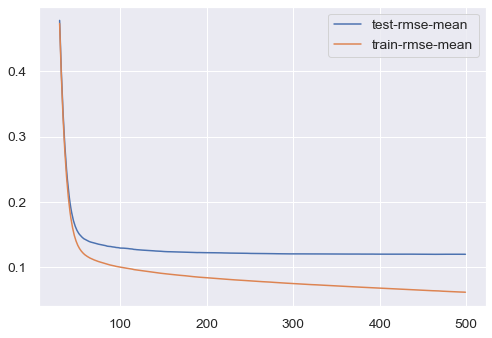

In [43]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [49]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(prepared, price_bc)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
xgb_preds = np.expm1(model_xgb.predict(prepared_test))
lasso_preds = np.expm1(grid_lasso.predict(prepared_test))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


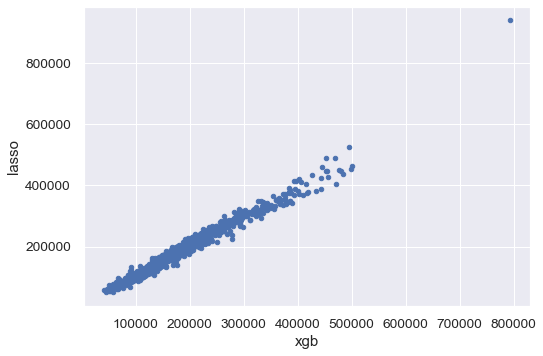

In [51]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [59]:
display_scores(xgb_preds,test_price)

R2              0.09
MSE    5319093856.93
RMSE        72932.12
MAE         54745.53
dtype: float64